In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataset.ScanObjectNNDataLoader import ScanObjectNNDataLoader
import os

We will inspect SCANObjectNN Dataset using the defined dataloaders. 

In [97]:
datadir = './data'
batch_size = 64
DATA_PATH = os.path.join(datadir, 'ScanObjectNN')
TEST_DATASET_bg = ScanObjectNNDataLoader(root=DATA_PATH, split='test', bg=True)
TEST_DATASET_nobg = ScanObjectNNDataLoader(root=DATA_PATH, split='test', bg=False)
testDataLoaderbg = torch.utils.data.DataLoader(TEST_DATASET_bg, batch_size=batch_size, shuffle=True,
                    num_workers=0, drop_last=True)
testDataLoader = torch.utils.data.DataLoader(TEST_DATASET_nobg, batch_size=batch_size, shuffle=True,
                    num_workers=0)

Use data with background points
The size of test data is 2882
Use data without background points
The size of test data is 2882


In [45]:
np.unique(TEST_DATASET_bg.label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [90]:
x_batch, y_batch = next(iter(testDataLoader))
print(x_batch.shape)

torch.Size([64, 3, 2048])


In [91]:
%matplotlib widget

In [119]:
k=0

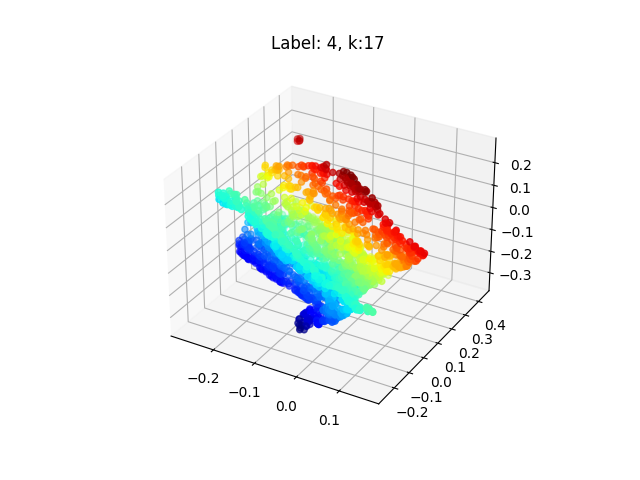

In [141]:
ax = plt.figure().add_subplot(projection='3d')
k +=1

x = x_batch[k, 0, :]
y = x_batch[k, 1, :]
z = x_batch[k, 2, :]

ax.set_title(f"Label: {y_batch[k].item()}, k:{k}")

ax.scatter(x,y,z, c=x+y+z, cmap='jet')
plt.show()

In [128]:
our_dict = {}
our_dict[4]="chair"

In [60]:
y_batch

tensor([ 3, 13,  4,  4,  7,  6,  9,  7, 10,  3,  6,  5,  5, 14,  7,  7, 13,  7,
         8,  3,  5,  2, 13,  2,  3,  4,  1,  0,  5,  8,  9,  8,  8,  6,  3, 11,
        12,  9,  5,  3, 11,  3,  1,  6, 12,  3, 12,  3,  4,  3,  8,  6,  2, 13,
         4,  3,  4, 11,  2, 13,  4,  8, 13,  4])

In [66]:
sum()

TypeError: unsupported operand type(s) for +: 'int' and 'numpy.str_'

In [69]:
np.array("78 135 201 127 347 395 149 181 221 105 267 118 254 242 82".split(), dtype=np.int).sum()

2902

In [77]:
np.histogram(TEST_DATASET_nobg.label, bins=np.unique(TEST_DATASET_nobg.label))

(array([ 83, 199, 133, 372, 390, 150, 204, 210, 241, 270, 110, 105, 120,
        295]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))